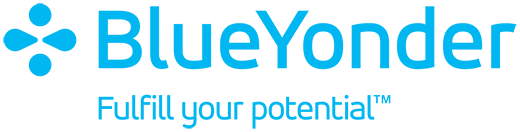

# 1. Fetch and load the data into DataFrame

I'm using shell commands to get the data from the provided source and then inflating it. Note that if the code is run twice in the same kernel, it may get stuck waiting for an input answer in console

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip

--2021-07-27 09:32:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.04MB/s    in 0.3s    

2021-07-27 09:32:45 (1.04 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


Import the required libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.preprocessing as preproc

The two datasets are loaded but I will focus on the main one: `hour_df`. We parse the data to make it usable (specially for the time plots)

In [ ]:
hour_df = pd.read_csv('/content/hour.csv')
day_df = pd.read_csv('/content/day.csv', parse_dates=['dteday'])

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 2. Explore the data

" Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered "

Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

## 2.1 Samples of the data

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,log_cnt,temperature,temp_cat
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2.772589,3.28,3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,3.688879,2.34,3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,3.465736,2.34,3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2.564949,3.28,3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.000000,3.28,3


In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


As aforementioned in the source documentation of the dataset, both datasets *day.csv* and *hour.csv* provide the same information, just differing on an extra feature `hr` at *hour.csv*

## 2.2 Shape of the data

In [ ]:
datasets = {'day dataset' : day_df,
            'hour dataset' : hour_df}
for key in datasets:
  print(f'The number of records of {key} is {len(datasets[key])}')

The number of records of day dataset is 731
The number of records of hour dataset is 17379


As the number of records in the **day dataset** is 731, almost equivalent to 2 natural years of data recording (365 x 2=750) and the **hour dataset** has 17379 records, also nearly equivalent to 2 years of data recording in hourly sampling (750 days x 24h = 17544)

## 2.3 Data types of the features

In [ ]:
print(day_df.info(), hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

The only non-numerical feature is `dteday`. However I will be treating as categorical variables all but `temp`, `atemp`, `hum` and `windspeed` (Excluding, of course, the `dteday` timestamp feature

## 2.4 Distribution of the features

Here I plot the numerical variables mentioned above (2.3)

In [ ]:
numerical_features = hour_df[['temp', 'atemp', 'hum', 'windspeed']]

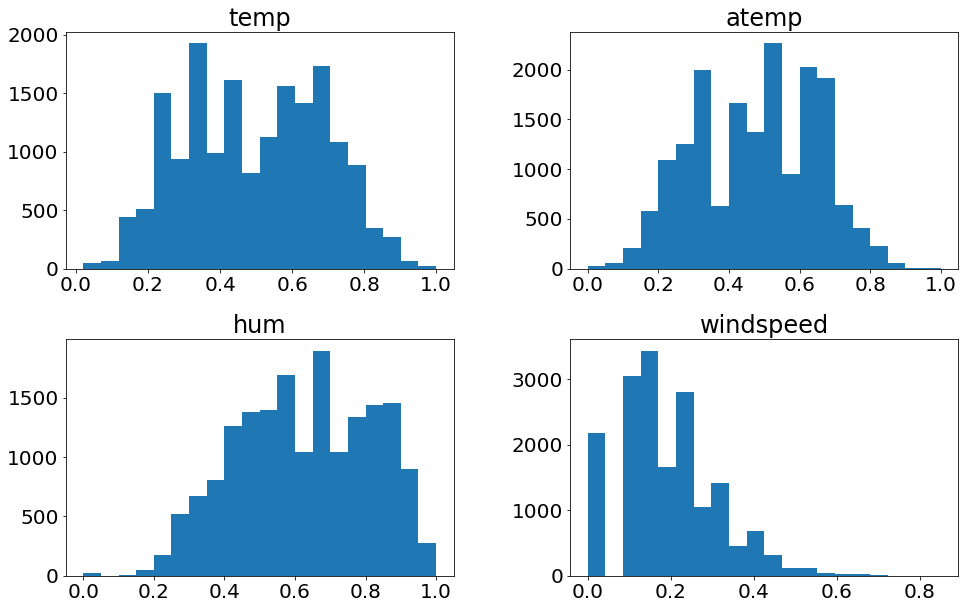

In [ ]:
import matplotlib.pyplot as plt
numerical_features.hist(figsize=(16,10), bins=20, grid=False)
plt.show()

See that the numerical variables are already scaled (min-max normalised)

In [ ]:
hour_df.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

There are very few (just 3) records of very disfavourable weather

## 2.5 Distribution of the dependent variable `cnt`

Here I plot the distribution plot and the normal probability plot to see the goodness of fit.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


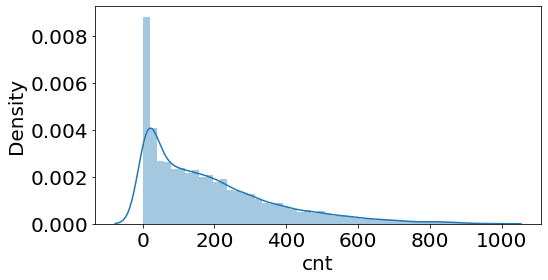

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(hour_df['cnt'])
plt.show()

The distribution is very positively skewed, let's check the normal probability plot:

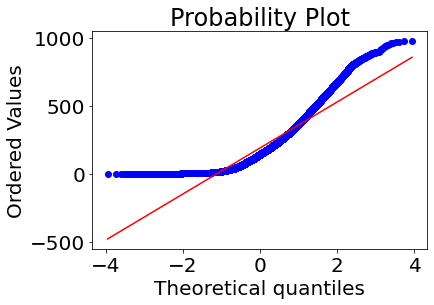

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(hour_df['cnt'], dist='norm', fit=True, plot=ax)
plt.show()

The distribution does not fit to a normal distribution. Let's check with logarithmic transformation:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


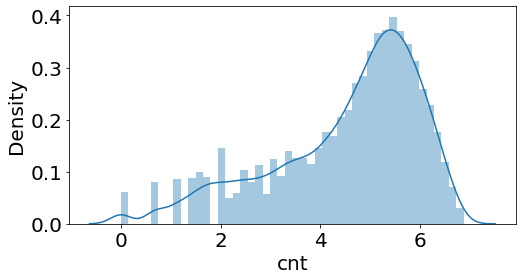

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(np.log(hour_df['cnt']))
plt.show()

It does not look perfect but more similar to the normal bell-shape

In [ ]:
hour_df['log_cnt'] = np.log(hour_df['cnt'])

Let's check the probability plot to see the goodness of fit to the normal distribution:

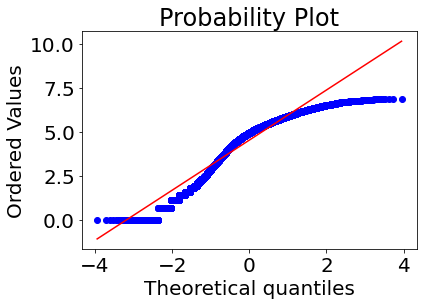

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(hour_df['log_cnt'], dist='norm', fit=True, plot=ax)
plt.show()

Still it is not a perfect fit. However the model we'll be using will not require a normal distribution of the dependent variable. See in the next section (3)

## 2.6 Null values

In [ ]:
hour_df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
log_cnt        0
temperature    0
temp_cat       0
dtype: int64

No null values, it will avoid imputing some bias to the data

## 2.7 Collinearity and correlation to the dependent variable

In [ ]:
corr_matrix = day_df.corr()
corr_matrix["cnt"].sort_values(ascending=False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

 `registered` and `casual` features cannot be used to predict the data or they will blurry our results providing almost perfect false predictions 

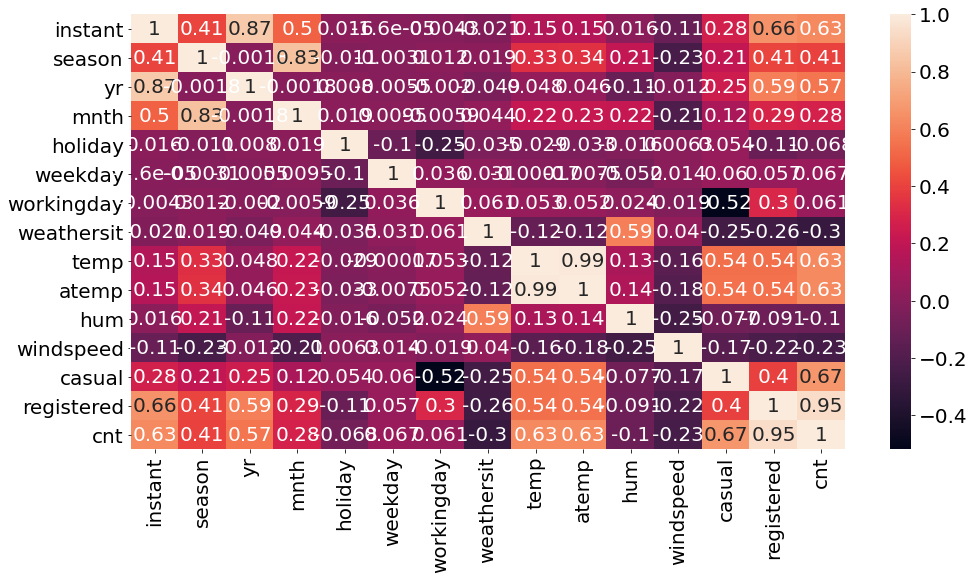

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(day_df.corr(), annot=True)
plt.show()

- `registered` and `casual` feature have a strong correlation to the dependent variable but they cannot be taken into account since they are aposteriori information
-  `holiday` and `workingday `weekday` provide similar but not equal information
- `temp` and `atemp` provide the same information. `temp` has little bit less collinearity with `hum` and `windspeed`.
- `humidity` has almost no correlation to the dependent variable

## 2.8 Data visualisations

In order to speed up, I will be using the day resampled dataset for some plottings.

**Barplot months-cnt**

In [ ]:
months = ['January','February','March','April','May',
          'June', 'July', 'August', 'September',
          'October', 'November', 'December']
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
temperature = ['-10 to -5ºC', '-5 to 0ºC', '0 to 5ºC',
               '5 to 10ºC', '10 to 15ºC', '15 to 20ºC',
               '20 to 25ºC', '25 to 30ºC', '30 to 35ºC',
               '35 to 40ºC']

months_ticks = np.arange(0,12)
seasons_ticks = np.arange(0,4)

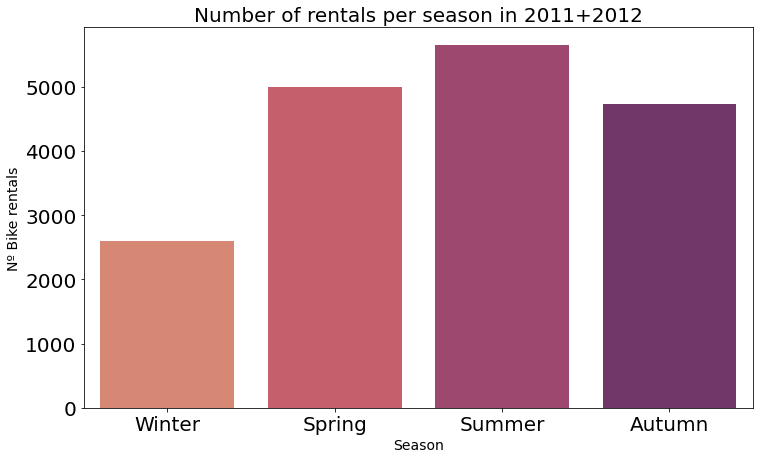

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=day_df, x="season", y="cnt",
            palette='flare', ci=None, 
            ax=ax)
plt.xticks(labels=seasons, ticks=seasons_ticks)
plt.title("Number of rentals per season in 2011+2012", fontsize=20)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Nº Bike rentals", fontsize=14)
plt.show()

Winter season is clearly the one with less number of rentals. Let's check more in detail the number of rentals per month:

In [ ]:
plt.rcParams.update({'font.size': 14})

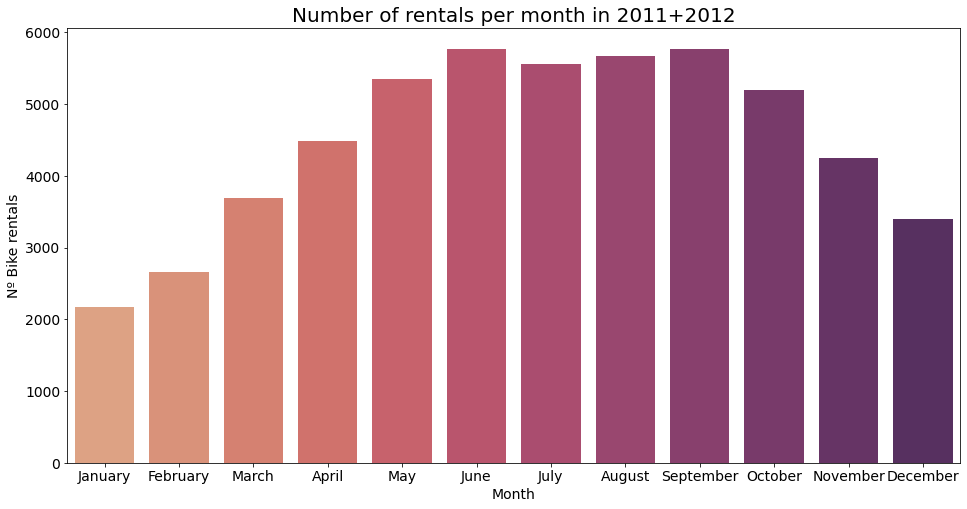

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=day_df, x="mnth", y="cnt",
            palette='flare', ci=None, ax=ax)
plt.xticks(labels=months, ticks=months_ticks)
plt.title("Number of rentals per month in 2011+2012", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Nº Bike rentals", fontsize=14)
plt.show()

It seems like the weather have an influence on the number of rentals, let's check more in detail to the temperature:

In [ ]:
hour_df['temperature'] = hour_df.eval('(temp*47)-8')
hour_df["temp_cat"] = pd.cut(hour_df["temperature"],
                              bins=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, np.inf],
                              labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

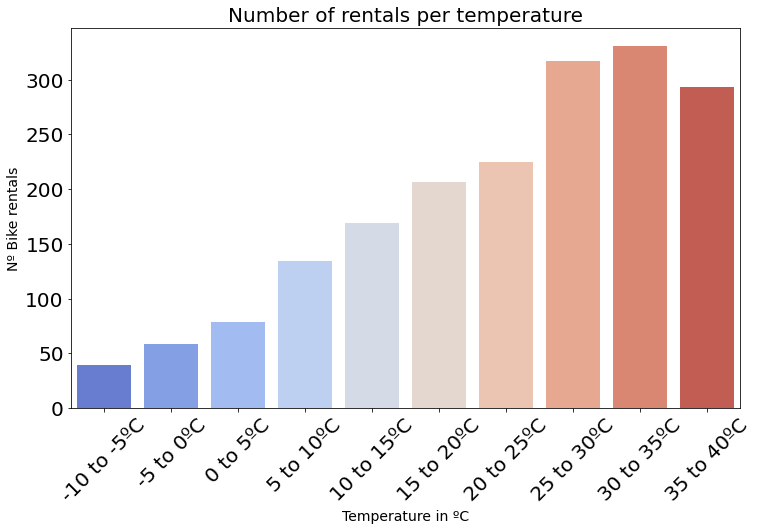

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data=hour_df, x="temp_cat", y="cnt",
            palette='coolwarm', ci=None, 
            ax=ax)
plt.xticks(labels=temperature, ticks=np.arange(0,10), rotation = 45)
plt.title("Number of rentals per temperature", fontsize=20)
plt.xlabel("Temperature in ºC", fontsize=14)
plt.ylabel("Nº Bike rentals", fontsize=14)
plt.show()

The assumption was right, the temperature influence the number of rentals. The hotter the higher number of rentals (with a small decrease with too high temperature)

**Lineplot date-cnt**

Let's plot a time-series plot with the number of rentals and let's see if any information can be gathered:

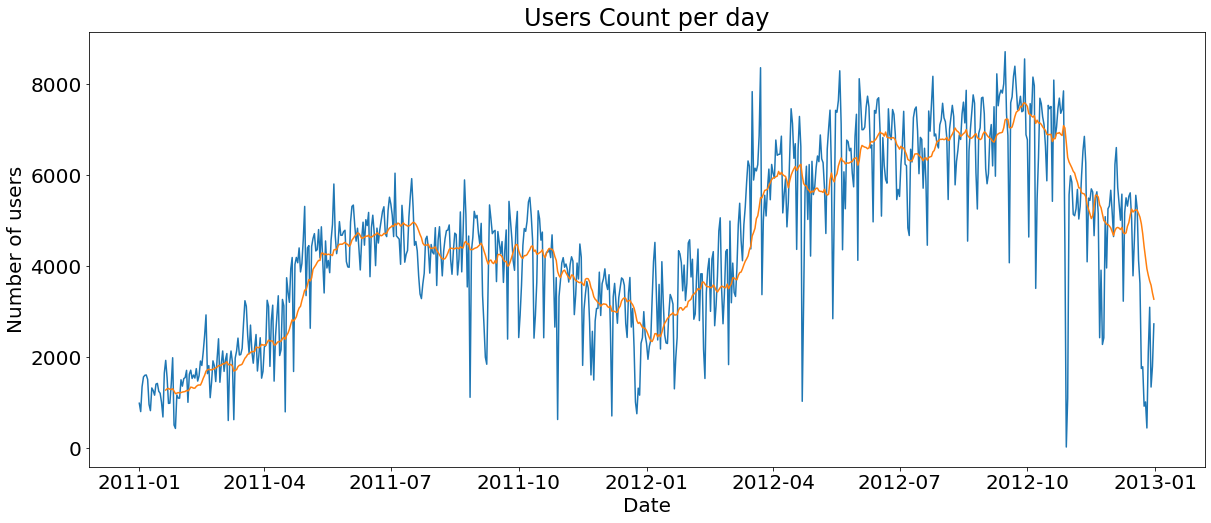

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(day_df.set_index('dteday')["cnt"])
ax.plot(day_df.set_index('dteday')["cnt"].rolling(window=20).mean())
ax.set(xlabel='Date', ylabel='Number of users',
       title="Users Count per day",label='big')
plt.show()

At a glance, the second year (2012) have more number of rentals (see the moving average with window=20 days to soften the variability).

Let's plot the hourly distribution of reservation per season, month and day:

In [ ]:
plt.rcParams.update({'font.size': 20})

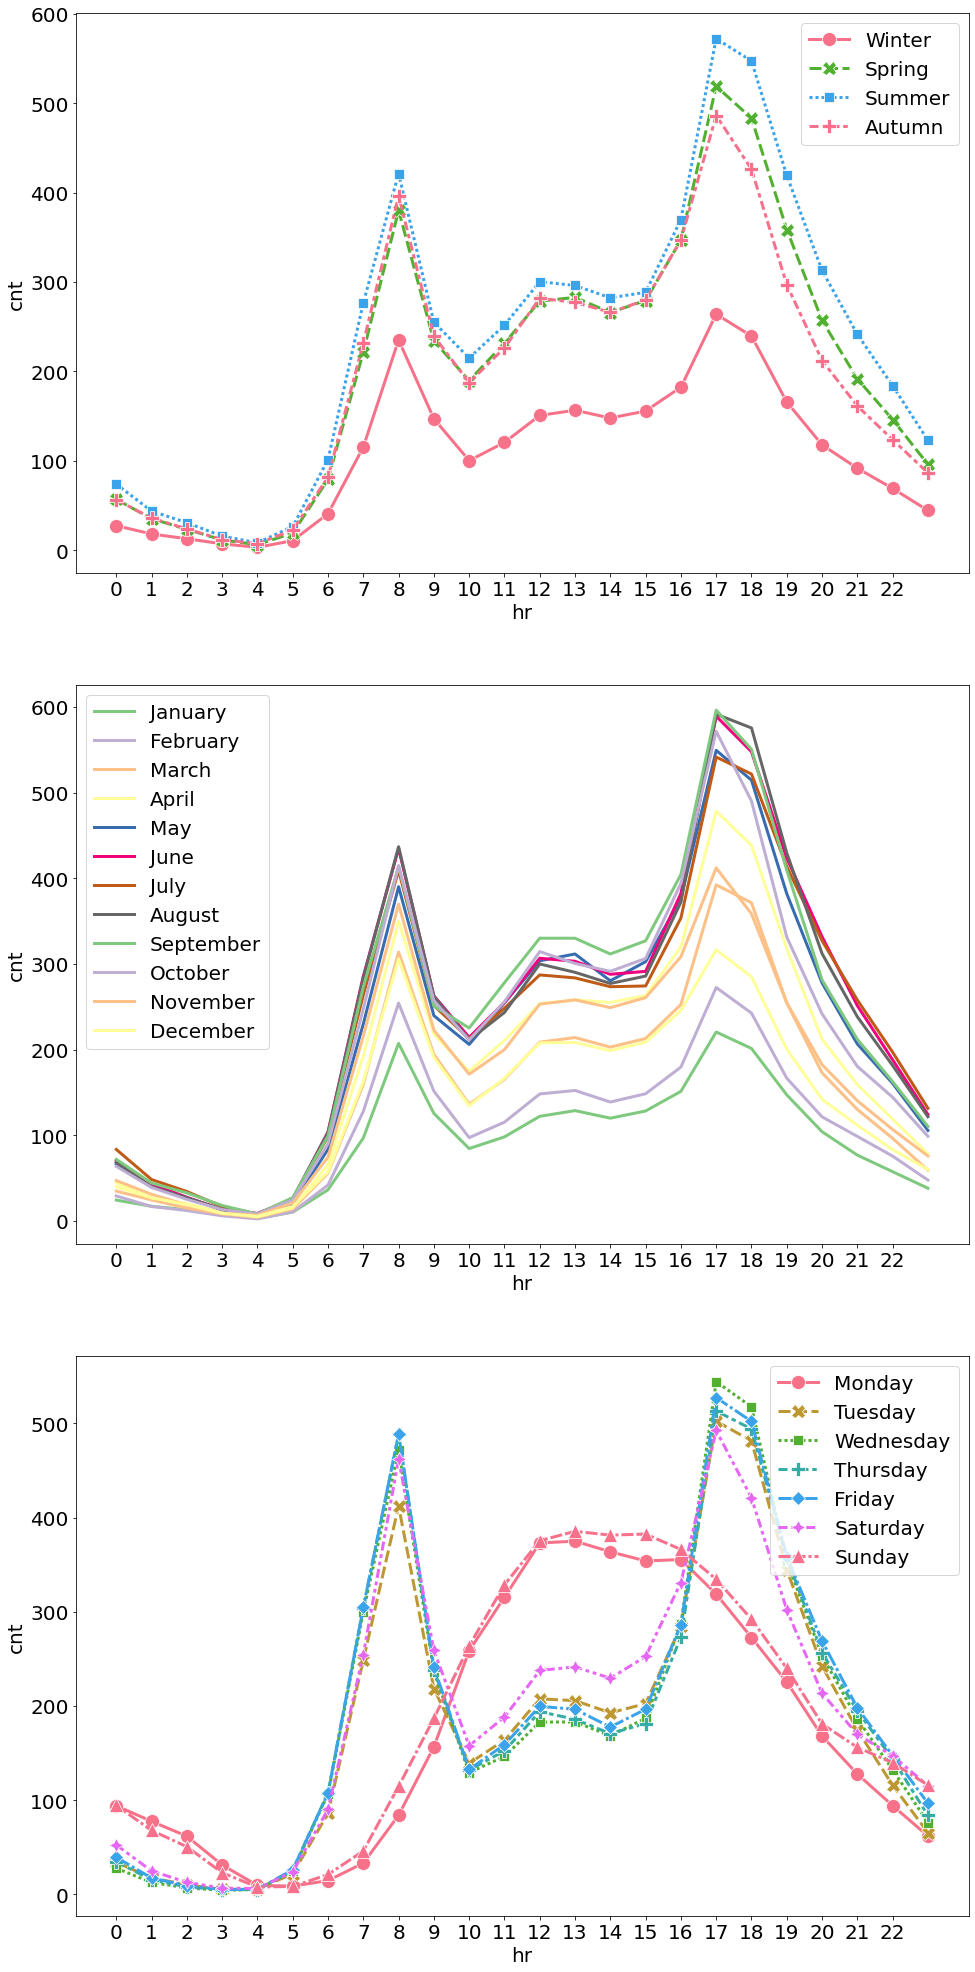

In [ ]:
fig, axes = plt.subplots(figsize=(16,35), nrows=3)
sns.lineplot(data=hour_df,
             x="hr", y='cnt',
             hue='season',style='season',
             markers = True, ci=None,
             palette="husl",
             linewidth = 3,
             markersize=14,
             ax=axes[0])


sns.lineplot(data=hour_df,
             x="hr", y='cnt',
             hue='mnth',
             markers = True, ci=None,
             palette="Accent",
             linewidth = 3,
             markersize=14,
             ax=axes[1])

sns.lineplot(data=hour_df,
             x="hr", y='cnt',
             hue='weekday',style='weekday',
             markers = True, ci=None,
             palette="husl",
             linewidth = 3,
             markersize=14,
             ax=axes[2])

for ax in axes: ax.set_xticks(np.arange(0,23))
axes[2].legend(loc='upper right', 
               labels=['Monday', 'Tuesday','Wednesday', 'Thursday',
                       'Friday', 'Saturday','Sunday'])
axes[1].legend(labels=months)
axes[0].legend(labels=seasons)

plt.show()

Both first and second illustration have similar shapes. However the last one illustrates how different is the distribution of workdays and weekends

# 3. Feature Engineering

The data is already very clean. However categorical features should be encoded. 

Since we will use Random Forest Regressor that takes feature imporance into account, it will not require a deep feature selection

In [ ]:
X = hour_df.drop(['casual', 'registered', 'dteday', 'instant','dteday', 'cnt', 'log_cnt'], axis=1)
y = hour_df['log_cnt']
Y = hour_df['cnt']

In [ ]:
cat_attribs = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

Let's encode the categorical variables to One-hot encoding format

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


hour_pipeline = ColumnTransformer([
	("cat", OneHotEncoder(), cat_attribs)],
  remainder='passthrough')

prepared_hour_df = hour_pipeline.fit_transform(X)

Let's use cross validation (80% training, 20% test):

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# 4. Train the model

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=9, verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.4s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=9, verbose=1, warm_start=False)

# 5. Evaluate the model

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
hour_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, hour_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


41.56942139761926

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, r2
hour_predictions = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, hour_predictions)
rf_mse = mean_squared_error(y_test, hour_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, hour_predictions)

print('Mean Absolute Error:', round(rf_mae, 2))
print('Mean Squared Error:', round(rf_rmse, 2))
print('R-squared scores:', round(rf_r2, 2))

Mean Absolute Error: 24.96
Mean Squared Error: 41.57
R-squared scores: 0.95


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Let's see a sample of how our predictions behave: 

In [ ]:
list(zip(y_test, hour_predictions))[0:10]

[(79, 95.77),
 (288, 228.9),
 (184, 227.67),
 (85, 108.7),
 (279, 221.23),
 (165, 233.14),
 (4, 4.04),
 (554, 562.41),
 (432, 442.9),
 (151, 137.42)]

# Extra: Further model improvement (Not included in the report)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 63.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 92.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1,2, 3],
    'min_samples_split': [1,2,3],
    'n_estimators': [1300, 1400, 1500]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 52.5min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_opt = RandomForestRegressor(bootstrap=True, max_depth=90,
                               max_features=3, min_samples_leaf=1,
                               min_samples_split=2, n_estimators=1500)

In [ ]:
rf_opt.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
hour_predictions = rf_opt.predict(X_test)
rf_mse = mean_squared_error(y_test, hour_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.4443587541483144

In [ ]:
list(zip(y_test, hour_predictions))[0:10]

[(480, 373.9),
 (211, 190.99),
 (367, 341.61),
 (214, 176.18),
 (142, 106.0),
 (233, 226.54),
 (303, 323.82),
 (289, 308.02),
 (162, 128.99),
 (20, 17.89)]